# How does a bike-share navigate speedy success?

Cyclistic, a bike-sharing company in Chicago, aims to expand its customer base by converting casual riders into annual members. To achieve this goal, the marketing team needs to understand the usage patterns of both casual riders and annual members. This case study will leverage data analysis and visualizations to gain insights into user behavior and inform a data-driven marketing strategy.


# Preparing the data

>Setting up the R environment to work with

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(conflicted) # package of conflicted 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "divvy-trips-csv"

use the conflicted package to manage conflicts

In [2]:
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


## Importing the data

Importing the data we're working with,

(The data has been made available by
Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement).)

In [3]:
q1_2019 <- read_csv("/kaggle/input/divvy-trips-csv/Divvy_Trips_2019_Q1.csv.csv")
q1_2020 <- read_csv("/kaggle/input/divvy-trips-csv/Divvy_Trips_2020_Q1.csv.csv")

Rows: 365069 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): start_time, end_time, from_station_name, to_station_name, usertype,...
dbl (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num (1): tripduration

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 426887 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ride_id, rideable_type, started_at, ended_at, start_station_name, e...
dbl (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, en...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Inspecting and cleaning the data
Now we can check the data we've just imported

In [4]:
colnames(q1_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

As we can see the colnames is not the same on both tables. To ensure a smooth and accurate analysis, we'll standardize the column names across both tables.

> Renaming columns  to make them consistent with q1_2020

In [5]:
q1_2019 <- rename(q1_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid
                   ,started_at = start_time
                   ,ended_at = end_time
                   ,start_station_name = from_station_name
                   ,start_station_id = from_station_id
                   ,end_station_name = to_station_name
                   ,end_station_id = to_station_id
                   ,member_casual = usertype
                   )
#verifying the columns
colnames(q1_2019)
colnames(q1_2020)

[1] "ride_id"            "started_at"         "ended_at"          
 [4] "rideable_type"      "tripduration"       "start_station_id"  
 [7] "start_station_name" "end_station_id"     "end_station_name"  
[10] "member_casual"      "gender"             "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

Here we can see the columns are renamed now let's proceed with cheking data

> Inspecting the dataframes and look for incongruencies

In [6]:
str(q1_2019)
str(q1_2020)

spc_tbl_ [365,069 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:365069] 21742443 21742444 21742445 21742446 21742447 ...
 $ started_at        : chr [1:365069] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:365069] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : num [1:365069] 2167 4386 1524 252 1170 ...
 $ tripduration      : num [1:365069] 390 441 829 1783 364 ...
 $ start_station_id  : num [1:365069] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:365069] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:365069] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:365069] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member

Here we can see the datatypes of the two tables isn't matching. 

For a better analysis 
> Convert ride_id and rideable_type to character so that they can stack correctly

In [7]:
q1_2019 <-  mutate(q1_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 

Now the data seems good to combine
>  Let's stack individual quarter's data frames into one big data frame


In [8]:
all_trips <- bind_rows(q1_2019, q1_2020)
#review the data we combined
head(all_trips)

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear,start_lat,start_lng,end_lat,end_lng
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,NA,NA,NA,NA
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,NA,NA,NA,NA
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,NA,NA,NA,NA
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,NA,NA,NA,NA
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,NA,NA,NA,NA
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983,NA,NA,NA,NA


Before diving deeper into the analysis, we'll perform some data cleaning to focus on the most relevant information for understanding user behavior. This involves removing columns that might not be crucial for our current goals.

In [9]:
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender,  "tripduration"))

Now let's inspect the modified data

In [10]:
#let's insepect all trips table
colnames(all_trips)
#Checking how many rows are in this dataframe
nrow(all_trips)
#Checking the dimentions of the dataframe
dim(all_trips)
#let's see the first 5 rows of the data to check if the data is arranged correctly
head(all_trips)
#checking the datatype
str(all_trips)
#summary of the data

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

[1] 791956

[1] 791956      9

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


tibble [791,956 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : chr [1:791956] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:791956] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "Subscriber" "Subscriber" "Subscriber" "Subscri

Analyze 'member_casual' column to understand user behavior patterns.Other columns were excluded as they primarily contain non-recurring data,limiting their utility for identifying user segments based on usage patterns.

In [11]:
table(all_trips$member_casual)


    casual   Customer     member Subscriber 
     48480      23163     378407     341906 

As we can see the column member_casual has 4 values "member", "casual", "Subscriber", "Customer"

We have another name for member as subscriber and casual as customer,  Let's resolve that

In [12]:
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))
#let's see if the values are rearranged 
table(all_trips$member_casual)


casual member 
 71643 720313 

We will want to add more tables of date day and month to aggregate the data.
This will allow us to aggregate ride data for each month, day, or year before completing these operations we could only aggregate at the ride level

Now let's create columns for day , month, year and also day of the week

In [13]:
#let's crate a column for date by using the started at column
all_trips$date <- as.Date(all_trips$started_at)
#Now let's create a column for day by extracting the day from the date column 
all_trips$day <- format(as.Date(all_trips$date), "%d")
#Creating month column 
all_trips$month <- format(as.Date(all_trips$date), "%m")
#Creating year
all_trips$year <- format(as.Date(all_trips$date), "%Y")
#Creating day of week
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

#Inspecting the changes
head(all_trips)
tail(all_trips)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,day,month,year,day_of_week
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,member,2019-01-01,01,01,2019,Tuesday
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),member,2019-01-01,01,01,2019,Tuesday
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),member,2019-01-01,01,01,2019,Tuesday
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,member,2019-01-01,01,01,2019,Tuesday
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,member,2019-01-01,01,01,2019,Tuesday
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,member,2019-01-01,01,01,2019,Tuesday


ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,day,month,year,day_of_week
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
6F4D221BDDFD943F,2020-03-10 10:40:27,2020-03-10 10:40:29,docked_bike,675,HQ QR,675,HQ QR,casual,2020-03-10,10,03,2020,Tuesday
ADDAA33CEBCAE733,2020-03-10 10:40:06,2020-03-10 10:40:07,docked_bike,675,HQ QR,675,HQ QR,casual,2020-03-10,10,03,2020,Tuesday
82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,docked_bike,161,Rush St & Superior St,240,Sheridan Rd & Irving Park Rd,member,2020-03-07,07,03,2020,Saturday
AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,docked_bike,141,Clark St & Lincoln Ave,210,Ashland Ave & Division St,casual,2020-03-01,01,03,2020,Sunday
3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,docked_bike,672,Franklin St & Illinois St,264,Stetson Ave & South Water St,member,2020-03-07,07,03,2020,Saturday
064EC7698E4FF9B3,2020-03-08 13:03:57,2020-03-08 13:32:27,docked_bike,110,Dearborn St & Erie St,85,Michigan Ave & Oak St,casual,2020-03-08,08,03,2020,Sunday


Now we will add a column for our ride length and calculate the ride length based on the time difference between trip start and end

In [14]:
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

Let's inspect the data again and ensure the new columns we added is compatible for analysis

In [15]:
str(all_trips)

tibble [791,956 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : chr [1:791956] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:791956] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "member" "member" "member" "member" ...
 $ dat

Now let's check if the ride length data has any negative values

ride_length column is as 'difftime' which is not ideal for calculations, let's convert that to numeric

In [16]:
all_trips$ride_length <- as.numeric(all_trips$ride_length, units = "secs")

In [17]:
any(all_trips$ride_length<0)

[1] TRUE

Since the x

We got negative values in the ride length column, It might be because of faulty data. And we also needs to get rid of the columns when bikes were taken out of docks and checked for quality by Divvy.
Now filter out the bad data and create a new table

In [18]:
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]
#checking the new table 
head(all_trips_v2)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,day,month,year,day_of_week,ride_length
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,member,2019-01-01,01,01,2019,Tuesday,390
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),member,2019-01-01,01,01,2019,Tuesday,441
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),member,2019-01-01,01,01,2019,Tuesday,829
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,member,2019-01-01,01,01,2019,Tuesday,1783
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,member,2019-01-01,01,01,2019,Tuesday,364
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,member,2019-01-01,01,01,2019,Tuesday,216


# Process the data 
## Analysis

Let's start by descriptive analysis of ride length

In [19]:
summary(all_trips_v2$ride_length)
#Now let's compare the ride length of member and customer
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1      331      539     1189      912 10632022 

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,5372.7839
member,795.2523


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1393
member,508


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,10632022
member,6096428


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


Now let's see the daily avarage by members and customers

In [20]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,6090.7373
member,Friday,796.7338
casual,Monday,4752.0504
member,Monday,822.3112
casual,Saturday,4950.7708
member,Saturday,974.0730
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Thursday,8451.6669


We need to fix the order of weekdays

In [21]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#let's see the daily avarage again 
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Monday,4752.0504
member,Monday,822.3112
casual,Tuesday,4561.8039
member,Tuesday,769.4416
casual,Wednesday,4480.3724
member,Wednesday,711.9838
casual,Thursday,8451.6669


Let's analyse data by type and weekday

In [22]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,18652,5061.3044
casual,Mon,5591,4752.0504
casual,Tue,7311,4561.8039
casual,Wed,7690,4480.3724
casual,Thu,7147,8451.6669
casual,Fri,8013,6090.7373
casual,Sat,13473,4950.7708
member,Sun,60197,972.9383
member,Mon,110430,822.3112


Now let's visualise data by number of rides by rider type

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


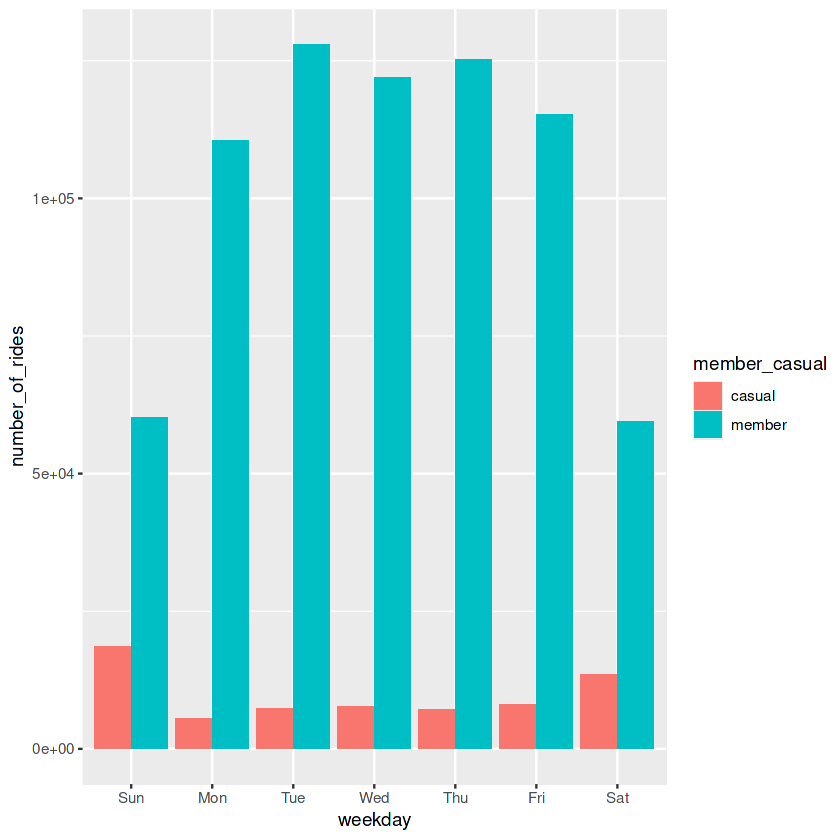

In [23]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

Creating a visualisation for avarage ride duration 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


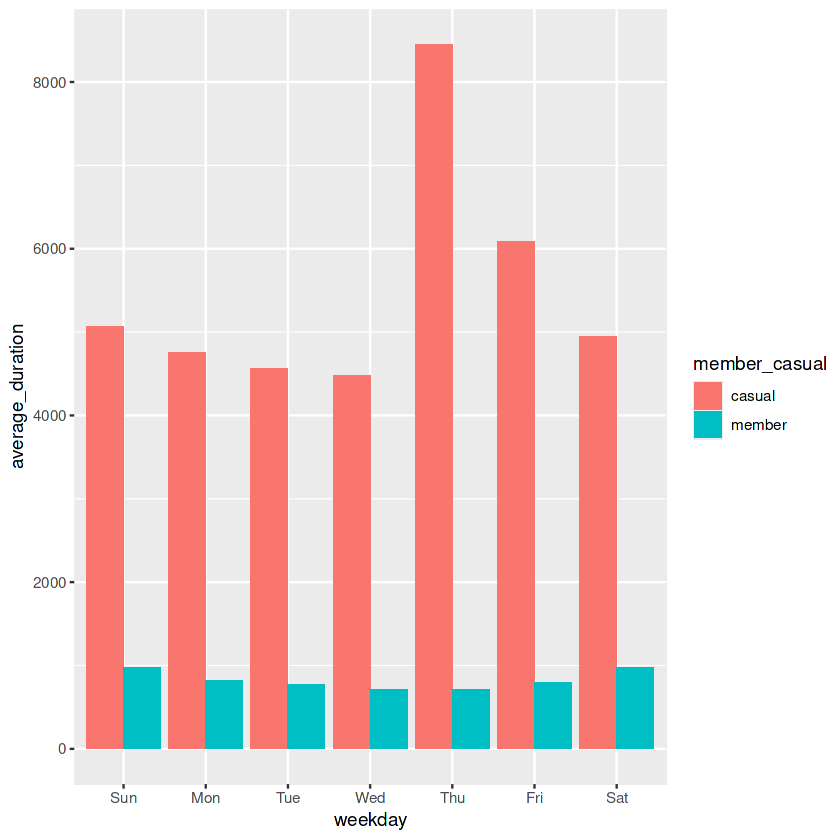

In [24]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

# Export
Now let's export the data as csv to visualize

Exporting the weekday avarage of member_casual data among the entire time period

In [25]:
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = 'avg_ride_length.csv')

Exporting the clean data to visualise with tableau

In [26]:
filtered_data <- all_trips_v2 %>% 
  select( -rideable_type)
write.csv(filtered_data, file='filtered_data.csv')